In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Đọc dữ liệu

In [2]:
btc_data = pd.read_csv('BTC-USD.csv')
eth_data = pd.read_csv('ETH-USD.csv')

Dữ liệu BTC-USD

In [3]:
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/1/2019,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4.324201e+09
1,1/2/2019,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5.244857e+09
2,1/3/2019,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4.530215e+09
3,1/4/2019,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4.847965e+09
4,1/5/2019,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5.137610e+09


Dữ liệu ETH-USD

In [4]:
eth_data.head()

,Date,Close-ETH
0,1/1/2019,140.819412
1,1/2/2019,155.047684
2,1/3/2019,149.135010
3,1/4/2019,154.581940
4,1/5/2019,155.638596


Kết hợp dữ liệu BTC và ETH

In [5]:
data = pd.merge(btc_data, eth_data, on='Date')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close-ETH
0,1/1/2019,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4.324201e+09,140.819412
1,1/2/2019,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5.244857e+09,155.047684
2,1/3/2019,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4.530215e+09,149.135010
3,1/4/2019,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4.847965e+09,154.581940
4,1/5/2019,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5.137610e+09,155.638596


**Dự đoán 30 ngày cho ETH bằng ARIMA**

In [6]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 39.8 MB/s eta 0:00:00


In [7]:
eth_data = eth_data[['Date', 'Close-ETH']]
eth_data = eth_data.dropna() # Drop missing values
# eth_data = eth_data.reset_index(drop=True) # Reset the index
eth_data['Date'] = pd.to_datetime(eth_data['Date'])
eth_data.set_index('Date', inplace=True)

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(eth_data))
test_size = int(0.3 * len(eth_data))
val_size = len(eth_data) - train_size - test_size

train_data = eth_data[:train_size]
test_data = eth_data[train_size:train_size+test_size]
val_data = eth_data[train_size+test_size:]
print(eth_data)

              Close-ETH
Date                   
2019-01-01   140.819412
2019-01-02   155.047684
2019-01-03   149.135010
2019-01-04   154.581940
2019-01-05   155.638596
...                 ...
2023-03-27  1715.460815
2023-03-28  1772.785645
2023-03-29  1793.001831
2023-03-30  1792.737183
2023-03-31  1822.022095

[1551 rows x 1 columns]


In [8]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close-ETH'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10493.298, Time=1.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10534.801, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10507.649, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10513.967, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10533.477, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10493.148, Time=1.46 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10494.871, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10491.305, Time=1.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10495.902, Time=1.60 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10495.552, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10490.133, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=10512.896, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=10506.611, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=10494.531, Time=0.55 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [9]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close-ETH'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close-ETH'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [10]:
import datetime
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  eth_data.index[-1]
print(last_index)
next_30_days_index_eth = pd.date_range(start=last_index + datetime.timedelta(days=1), periods=30, freq='D')
print(next_30_days_index_eth)
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days_eth = np.array(next_30_days_index_eth).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days_eth = model.predict(n_periods=len(x_next_30_days_eth)) 

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days_eth)

2023-03-31 00:00:00
DatetimeIndex(['2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08',
               '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16',
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20',
               '2023-04-21', '2023-04-22', '2023-04-23', '2023-04-24',
               '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28',
               '2023-04-29', '2023-04-30'],
              dtype='datetime64[ns]', freq='D')
Predicted closing prices for the next 30 days:
[1894.84424578 1895.41543379 1894.95454132 1895.32643615 1895.02635365
 1895.26849068 1895.07310994 1895.23076295 1895.1035525  1895.20619881
 1895.12337335 1895.19020534 1895.1362785  1895.17979215 1895.14468092
 1895.17301222 1895.15015165 1895.16859788 1895.15371359 1895.16572375
 1895.15603273 1895.16385243 1895.1575427  1895.16263403 189

Validation RMSE: 480.23068148897323
Testing RMSE: 1285.5123604738685
Validation MAPE: 0.3236041340909358
Testing MAPE: 0.37153034119591216


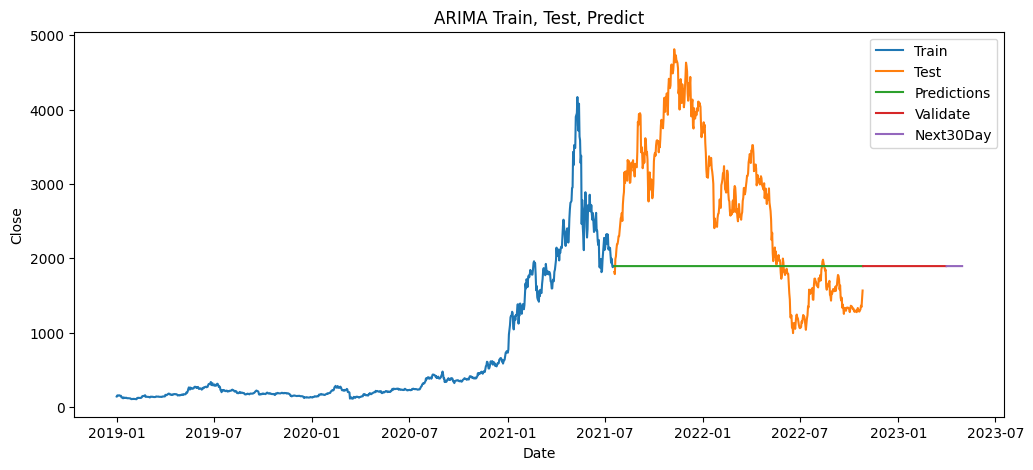

In [11]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = np.mean(np.abs(y_pred_val - y_val)/np.abs(y_val))  # MAPE
test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))  # MAPE
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMA Train, Test, Predict')
plt.plot(train_data.index, train_data['Close-ETH'])
plt.plot(test_data.index, test_data['Close-ETH'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
# plt.plot(last_data,y_next_30_days)
plt.plot(next_30_days_index_eth,y_next_30_days_eth)

plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

**SARIMAX**

**<h3>Dự đoán ARIMAX 6-3-1</h3>**

In [12]:

# data = data.reset_index(drop=True) # Reset the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close', 'Close-ETH']]
data = data.dropna() # Drop missing values

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]
print(len(train_data))
print(len(test_data))
print(len(val_data))

1085
310
156


In [13]:
from pmdarima.arima import auto_arima
train_exog = train_data[["Close-ETH"]]
model = auto_arima(train_data.Close, 
                   seasonal = True,
                   m=12,
                      test='adf',       # use adftest to find      
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True,  
                      stepwise=True,
                      exogenous= train_exog)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=18317.265, Time=3.42 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=18334.592, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=18328.984, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=18329.566, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=18333.913, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=18331.519, Time=2.77 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=5.20 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=18319.241, Time=11.71 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=9.62 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=18326.915, Time=2.27 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=18323.835, Time=6.55 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=10.89 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=12.34 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=18328.973, Time=1.42 sec
 ARIMA(2,1,1)(1,0,1)[12] i

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_data.Close, 
 exog=train_exog,
 order=(2, 1, 2),
  seasonal_order=(1, 0, 1, 12),
 enforce_invertibility=False, enforce_stationarity=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [16]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
test_exog = test_data[['Close-ETH']]
model_fit = model.fit()
# y_pred = model.predict(n_periods=len(y_test))
y_pred = model_fit.forecast(steps=len(y_test), exog=test_exog)
print(y_pred)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
val_exog = val_data[['Close-ETH']]
print(val_exog)
y_pred_val =  model_fit.forecast(steps=len(y_val), exog=val_exog)
print(y_pred_val)

2021-12-21    47666.783779
2021-12-22    47228.136227
2021-12-23    48403.763364
2021-12-24    47795.038372
2021-12-25    48200.121567
                  ...     
2022-10-22    21078.875765
2022-10-23    21553.316456
2022-10-24    21375.226946
2022-10-25    22501.451925
2022-10-26    23514.099324
Freq: D, Name: predicted_mean, Length: 310, dtype: float64
              Close-ETH
Date                   
2022-10-27  1514.374878
2022-10-28  1555.477905
2022-10-29  1619.698486
2022-10-30  1590.783325
2022-10-31  1572.714478
...                 ...
2023-03-27  1715.460815
2023-03-28  1772.785645
2023-03-29  1793.001831
2023-03-30  1792.737183
2023-03-31  1822.022095

[156 rows x 1 columns]
2021-12-21    23476.622250
2021-12-22    23803.131529
2021-12-23    24383.191647
2021-12-24    24074.854988
2021-12-25    23868.235529
                  ...     
2022-05-21    24951.426476
2022-05-22    25504.802466
2022-05-23    25699.956101
2022-05-24    25697.401286
2022-05-25    25980.098430
Freq: D, Na

In [17]:
import datetime
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
print(last_index)
# last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
next_30_days_index = pd.date_range(start=last_index + datetime.timedelta(days=1), periods=30, freq='D')
print(next_30_days_index)
# Create an array of 30 consecutive integers starting from last_index
# x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
x_next_30_days = np.array(next_30_days_index).reshape(-1, 1)



# Predict the closing prices for the next 30 days
y_next_30_days = model_fit.forecast(steps=len(x_next_30_days), exog = y_next_30_days_eth) 

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

2023-03-31 00:00:00
DatetimeIndex(['2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08',
               '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16',
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20',
               '2023-04-21', '2023-04-22', '2023-04-23', '2023-04-24',
               '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28',
               '2023-04-29', '2023-04-30'],
              dtype='datetime64[ns]', freq='D')
Predicted closing prices for the next 30 days:
2021-12-21    27149.422470
2021-12-22    27084.664121
2021-12-23    27040.331974
2021-12-24    27014.713227
2021-12-25    26979.621696
2021-12-26    26948.255183
2021-12-27    26926.318117
2021-12-28    26927.963765
2021-12-29    26919.003726
2021-12-30    26903.423363
2021-12-31    26877.762547
2022-01-01    26865.818287
2022-01-02    26849.

Validation RMSE: 2659.9271741563284
Testing RMSE: 3351.3736206179988
Validation MAPE: 0.1264265092729444
Testing MAPE: 0.09465633963354221


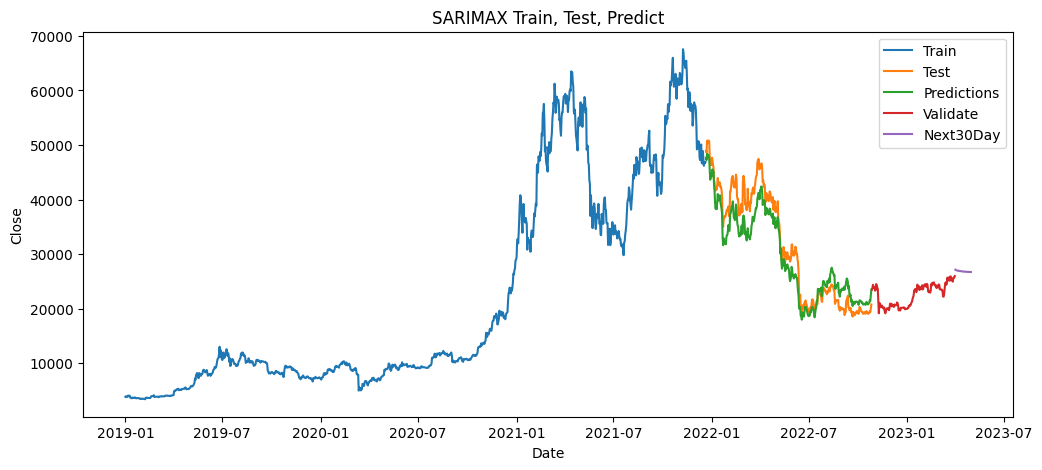

In [18]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = np.mean(np.abs(y_pred_val - y_val)/np.abs(y_val))  # MAPE
test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))  # MAPE
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)



# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('SARIMAX Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
# plt.plot(last_data,y_next_30_days)
plt.plot(next_30_days_index,y_next_30_days)

plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()